#### On va tester en faisant les calculs matriciels sur mon gpu de mon vieux pc portable # Milan # La gtx1050 va transpirer 

In [7]:
import numpy as np , matplotlib.pyplot as plt , cupy as cp ,cv2,time

In [6]:
device = cp.cuda.Device(0)
print("gpu nul :", cp.cuda.runtime.getDeviceProperties(0)['name'].decode())
print("multi process cuda :", device.attributes['MultiProcessorCount'])
print("vram dispo :", device.mem_info[1] // (1024 * 1024), "MB")

gpu nul : NVIDIA GeForce GTX 1050
multi process cuda : 5
vram dispo : 4034 MB


## Je vais tester la différences de temps de calcul pour du produit matriciel standadrd , mais sur des grandes matrices grahamiques

Comparaison entre le cpu nul et le gpu encore plus nul , cpu = i5 7300hq quad core # faible #gpu 1050ti 4gb # mega mou

In [9]:
souffrance = np.linspace(8000, 10000, num=5, dtype=int)
tempscpu = []
tempsgpu = []
truc = []

In [10]:
for i in souffrance:
    sommetempscpu,sommetempsgpu = 0,0
    for lucas in range(10):   #moyenne sur 10 calculs on ne sait jamais si un composant a mal à la tête 
        matricemechanteA = np.random.rand(i,i).astype(np.float32)
        matricemechanteB = np.random.rand(i,i).astype(np.float32)
        #test vitesse d'exceution cpu
        depart = time.time()
        np.dot(matricemechanteA,matricemechanteB)
        sommetempscpu += time.time() - depart


        #test vitesse gpu

        matricefoudroyanteA = cp.asarray(matricemechanteA)
        matricefoudroyanteB = cp.asarray(matricemechanteB)
        depart = time.time()
        cp.dot(matricefoudroyanteA,matricefoudroyanteB)
        cp.cuda.Device(0).synchronize()
        sommetempsgpu += time.time() - depart
        cp._default_memory_pool.free_all_blocks()   #liberer la vram à chaques fois car elle doit être remplis avec de telles tailles
    moycpu= sommetempscpu / 10
    moygpu = sommetempsgpu / 10
    tempscpu.append(moycpu)
    tempsgpu.append(moygpu)
    truc.append(moycpu / moygpu)

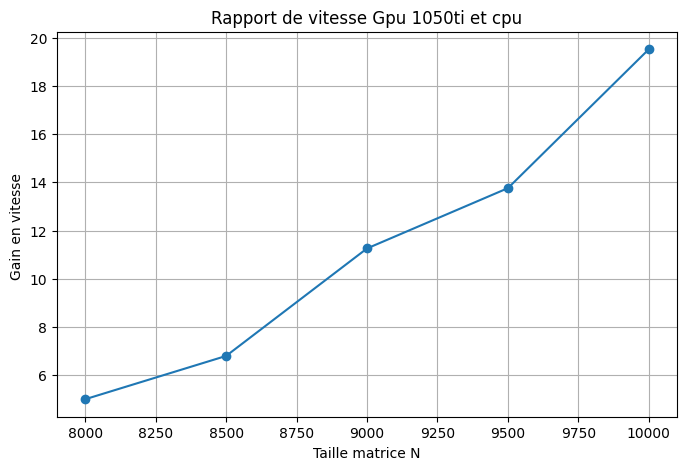

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(souffrance, truc, marker='o')
plt.title("Rapport de vitesse Gpu 1050ti et cpu")
plt.xlabel("Taille matrice N")
plt.ylabel("Gain en vitesse ")
plt.grid(True)
plt.show()


## Le calcul matriciel et ici le produit matriciel s'excecute en moyenne 20x plus rapidement sur le gpu que le cpu pour une taille de 10000 , et au pire pour une petite matrice 6x plus rapidement . C'est incroyablement plus rapide

## On va pouvoir utiliser ensuite cuda pour rendre les calculs vectoriels et matriciels plus rapide , néamoins pour la detection de bords.
## Puis mettre tout ca en c++